In [1]:
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import os

In [40]:
ENERGY_FIELD = "CPU_ENERGY (J)"

In [41]:
directory = "output/2025-02-24_23-24-00"

df_infos = []
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        filepath = os.path.join(directory, filename)
        run, set, experiment = filename.split(".")[0].split('_')
        df_infos.append({
            "run": run,
            "set": set,
            "experiment": experiment,
            "data": pd.read_csv(filepath)
        })

In [59]:
results = []

for df_info in df_infos:
    df = df_info['data']
    energy_gradients = df[ENERGY_FIELD].diff()
    energy_gradients = energy_gradients[24:115]
    energy_gradients = energy_gradients[energy_gradients > 0]
    if df_info['run'] == '0': 
        continue
    results.append({
        'run': df_info['run'],
        'set': df_info['set'],
        'experiment': df_info['experiment'],
        'total_energy': energy_gradients.sum()
    })

print(results)

[{'run': '10', 'set': '0', 'experiment': '0', 'total_energy': np.float64(162.20306396484375)}, {'run': '10', 'set': '0', 'experiment': '1', 'total_energy': np.float64(144.71075439453125)}, {'run': '10', 'set': '1', 'experiment': '0', 'total_energy': np.float64(179.50042724609375)}, {'run': '10', 'set': '1', 'experiment': '1', 'total_energy': np.float64(126.04776000976926)}, {'run': '10', 'set': '2', 'experiment': '0', 'total_energy': np.float64(99.83747863769167)}, {'run': '10', 'set': '2', 'experiment': '1', 'total_energy': np.float64(99.38371276855469)}, {'run': '11', 'set': '0', 'experiment': '0', 'total_energy': np.float64(157.62765502929688)}, {'run': '11', 'set': '0', 'experiment': '1', 'total_energy': np.float64(126.28097534179324)}, {'run': '11', 'set': '1', 'experiment': '0', 'total_energy': np.float64(181.8926849365198)}, {'run': '11', 'set': '1', 'experiment': '1', 'total_energy': np.float64(127.3551177978552)}, {'run': '11', 'set': '2', 'experiment': '0', 'total_energy': np

In [60]:
df = pd.DataFrame(results)

30
Set 0, Experiment 0 - Statistics=22.89168711374546, p=1.0693830657198982e-05
Sample does not look Gaussian (reject H0)
30
Set 0, Experiment 1 - Statistics=7.764565421184268, p=0.02060373908674404
Sample does not look Gaussian (reject H0)


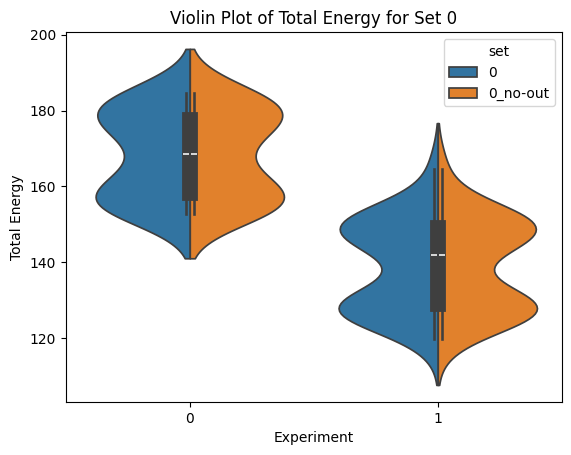

28
Set 1, Experiment 0 - Statistics=2.0161555602259367, p=0.3649197618503281
Sample looks Gaussian (fail to reject H0)
27
Set 1, Experiment 1 - Statistics=0.37659151133777724, p=0.8283696759721704
Sample looks Gaussian (fail to reject H0)


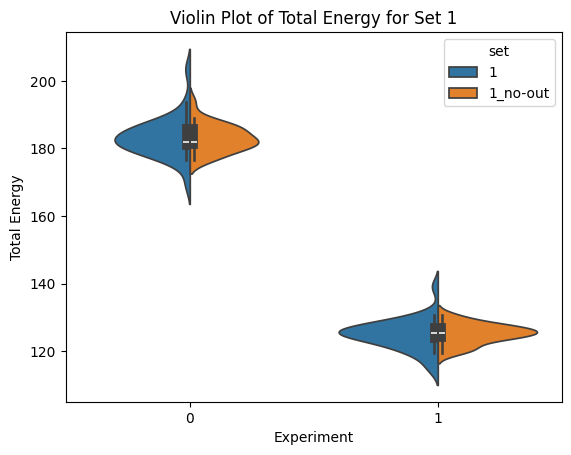

24
Set 2, Experiment 0 - Statistics=0.3519910975646472, p=0.8386217162165731
Sample looks Gaussian (fail to reject H0)
24
Set 2, Experiment 1 - Statistics=1.3084830007727728, p=0.5198362086517372
Sample looks Gaussian (fail to reject H0)


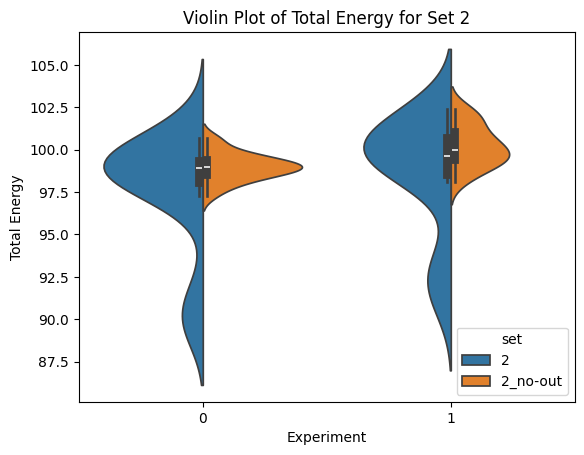

In [64]:
import seaborn as sns
from scipy.stats import normaltest
for set_value in range(3):
    data = []
    for experiment_value in range(2):
        filtered_df = df[(df['set'] == str(set_value)) & (df['experiment'] == str(experiment_value))]
        q1 = filtered_df['total_energy'].quantile(0.25)
        q3 = filtered_df['total_energy'].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        filtered_df_no = filtered_df[(filtered_df['total_energy'] >= lower_bound) & (filtered_df['total_energy'] <= upper_bound)]

        for value in filtered_df['total_energy']:
            data.append({
                'set': set_value,
                'experiment': experiment_value,
                'total_energy': value
            })
        for value in filtered_df_no['total_energy']:
            data.append({
                'set': str(set_value) + "_no-out",
                'experiment': experiment_value,
                'total_energy': value
            })
        print(filtered_df_no['total_energy'].count())
        stat, p = normaltest(filtered_df_no['total_energy'])
        print(f'Set {set_value}, Experiment {experiment_value} - Statistics={stat}, p={p}')
        if p >= 0.05:
            print('Sample looks Gaussian (fail to reject H0)')
        else:
            print('Sample does not look Gaussian (reject H0)')
    violin_df = pd.DataFrame(data)
    sns.violinplot(x='experiment', y='total_energy', hue='set', data=violin_df, split=True)
    plt.xlabel('Experiment')
    plt.ylabel('Total Energy')
    plt.title(f'Violin Plot of Total Energy for Set {set_value}')
    plt.show()

In [48]:
# for df_info in df_infos:
#     df = df_info["data"]
#     df.plot(y=ENERGY_FIELD)
# plt.xlabel('Index')
# plt.ylabel('PACKAGE_ENERGY (J)')
# plt.title('PACKAGE_ENERGY (J) of the First DataFrame')
# plt.show();